# Análise da OD-2017 
Foi realizada uma análise sobre a pesquisa <mark>Origem e Destino 2017</mark> para compreender a composição do público que viaja a pé, considerando aspectos como sexo, renda familiar, condição de atividade, Critério de Classificação Econômica Brasil... 

Fonte: [OD_2017](https://transparencia.metrosp.com.br/dataset/pesquisa-origem-e-destino/resource/4362eaa3-c0aa-410a-a32b-37355c091075) 

Ajuste fator de expansão para análises que contam as linhas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
od_path = '../data/OD/OD-2017/Banco de Dados-OD2017/od_2017.csv' # OD dataset path
df = pd.read_csv(od_path) # initial DataFrame

In [3]:
# selecting required columns
trips = df[['ZONA_O', 'MUNI_O', 'ZONA_D', 'MUNI_D', 'FE_VIA','MODOPRIN']] 
trips.head(3)

,ZONA_O,MUNI_O,ZONA_D,MUNI_D,FE_VIA,MODOPRIN
0,1.0,36.0,3.0,36.0,22.132647,16.0
1,3.0,36.0,1.0,36.0,22.132647,16.0
2,1.0,36.0,82.0,36.0,18.882487,1.0


## Representativade dos meios de transporte
Nesta seção, foi realizado um estudo para compreender quais são os meios de transporte mais utilizados

In [6]:
# Mapping dictionary
t_modes_map = {
    1: 'Metrô',
    2: 'Trem',
    3: 'Monotrilho',
    4: 'O/MO/P do município de São Paulo', # ônibus/micro-ônibus/perua
    5: 'O/MO/P de outros municípios',
    6: 'O/MO/P metropolitano',
    7: 'Transporte Fretado',
    8: 'Transporte Escolar',
    9: 'Dirigindo Automóvel',
    10: 'Passageiro de Automóvel',
    11: 'Táxi Convencional',
    12: 'Táxi não Convencional',
    13: 'Dirigindo Moto',
    14: 'Passageiro de Moto',
    15: 'Bicicleta',
    16: 'A Pé',
    17: 'Outros'
}

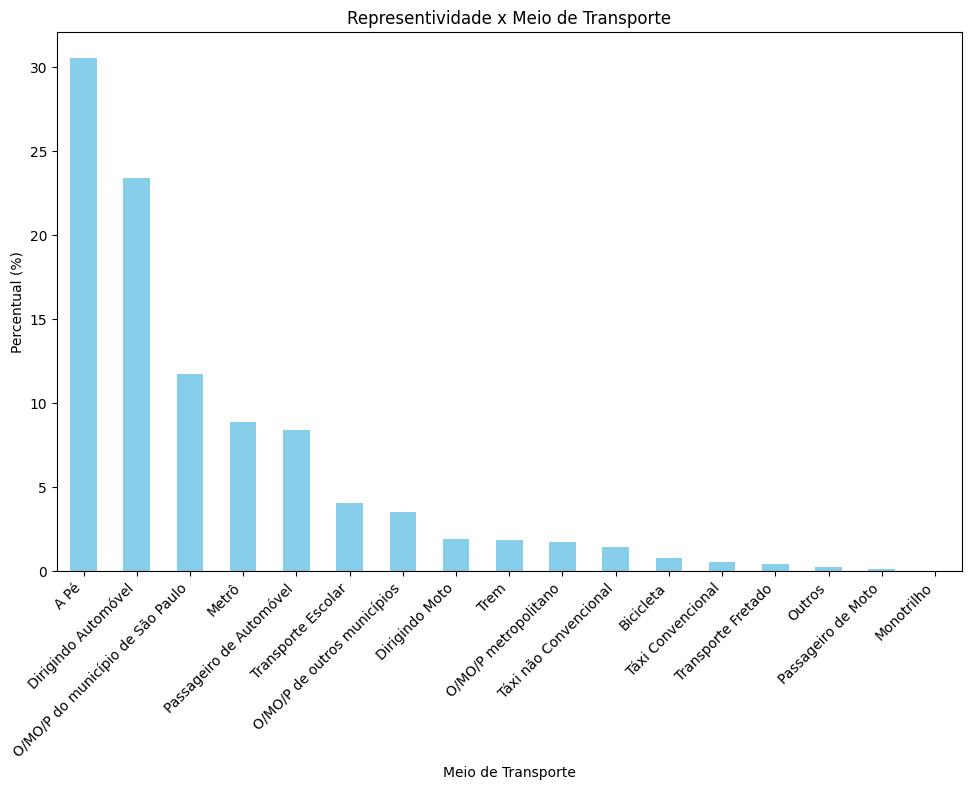

In [11]:
# Mapping transport modes names in 'MODOPRIN_DESC'
trips.loc[:, 'MODOPRIN_DESC'] = trips['MODOPRIN'].map(t_modes_map)

# Calculating percentual rep.
modoprin_counts = trips['MODOPRIN_DESC'].value_counts()
modoprin_percent = (modoprin_counts / modoprin_counts.sum()) * 100

# Plotting bar graph
plt.figure(figsize=(10, 8))
modoprin_percent.plot(kind='bar', color='skyblue')
plt.title('Representividade x Meio de Transporte')
plt.xlabel('Meio de Transporte')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

In [13]:
# count transport mode
transport_modes = trips['MODOPRIN'].value_counts().reset_index()
rows_sum = transport_modes['count'].sum()

In [17]:
# transport mode representation
transport_modes['Representation'] = (((transport_modes['count'] / rows_sum)*100).round(2)).apply(lambda x: f'{x:.2f}%')
transport_modes.head(5) # transport modes with highest trips

,MODOPRIN,count,Representation
0,16.0,48285,30.56%
1,9.0,37005,23.42%
2,4.0,18612,11.78%
3,1.0,14077,8.91%
4,10.0,13308,8.42%


## Análise censitária
Nesta seção, foi analisada a composição do público dos meios de transporte considerados relevantes para esse trabalho(a pé).

In [18]:
gendered_trips = df[['ZONA_O', 'MUNI_O', 'ZONA_D', 'MUNI_D', 'FE_VIA','MODOPRIN', 'SEXO']] # df with the 'SEXO' column
gendered_trips.head(3)

,ZONA_O,MUNI_O,ZONA_D,MUNI_D,FE_VIA,MODOPRIN,SEXO
0,1.0,36.0,3.0,36.0,22.132647,16.0,2
1,3.0,36.0,1.0,36.0,22.132647,16.0,2
2,1.0,36.0,82.0,36.0,18.882487,1.0,2


In [60]:
# Counting gender frequency
gender_counter = (gendered_trips['SEXO'].value_counts(normalize=True)*100).round(2)
gender_counter.index = gender_counter.index.map({1: 'Masculino', 2: 'Feminino'}) # mapping values to corresponding labels
print(gender_counter)

SEXO
Feminino     51.29
Masculino    48.71
Name: proportion, dtype: float64


In [19]:
g_distr_trip = gendered_trips
g_distr_trip['MODOPRIN'] = g_distr_trip['MODOPRIN'].replace(t_modes_map)

C:\Users\55119\AppData\Local\Temp\ipykernel_10632\1321302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_distr_trip['MODOPRIN'] = g_distr_trip['MODOPRIN'].replace(t_modes_map)


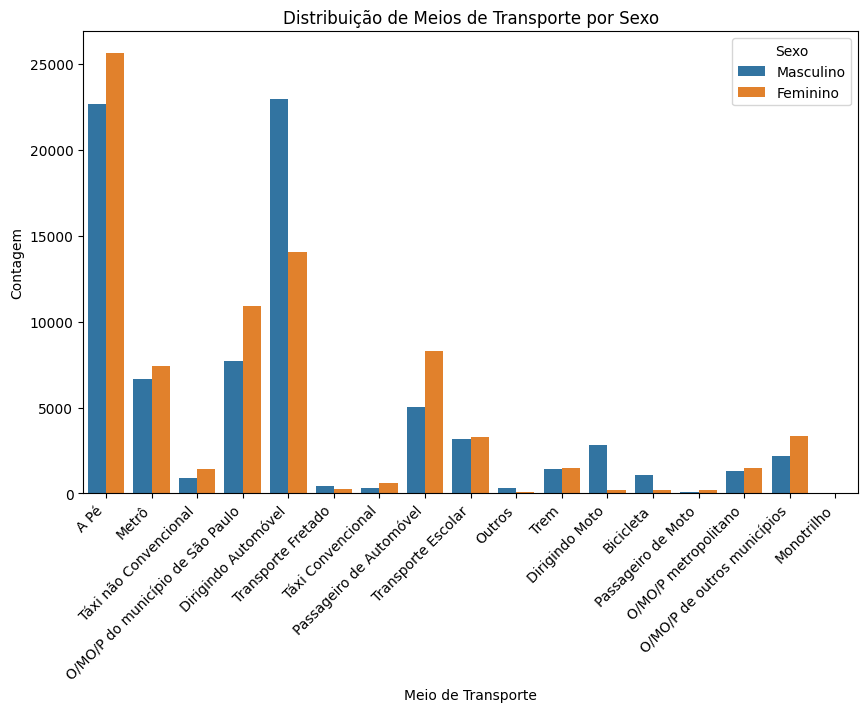

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MODOPRIN', hue='SEXO', data=g_distr_trip)
plt.title('Distribuição de Meios de Transporte por Sexo')
plt.xlabel('Meio de Transporte')
plt.ylabel('Contagem')
plt.legend(title='Sexo', labels=['Masculino', 'Feminino'])
plt.xticks(rotation=45, ha='right') 
plt.show()

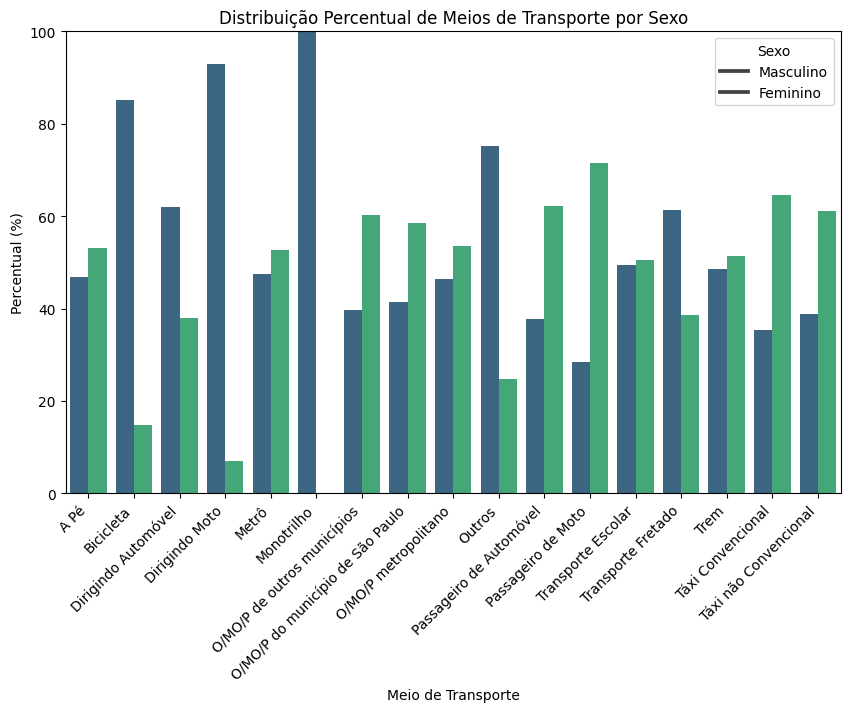

In [92]:
# Calcular as contagens e percentuais
count_data = g_distr_trip.groupby(['MODOPRIN', 'SEXO']).size().reset_index(name='Count')
total_counts = count_data.groupby('MODOPRIN')['Count'].transform('sum')
count_data['Percentual'] = count_data['Count'] / total_counts * 100

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='MODOPRIN', y='Percentual', hue='SEXO', data=count_data, palette='viridis')

# Personalizar o gráfico
plt.title('Distribuição Percentual de Meios de Transporte por Sexo')
plt.xlabel('Meio de Transporte')
plt.ylabel('Percentual (%)')
plt.legend(title='Sexo', labels=['Masculino', 'Feminino'])
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100) 
plt.show()

## Razões para o transporte a pé

Foram analisados os motivos para que os meios de transporte tenham sido escolhidos para realizar a viagem.

In [135]:
ped = df[['ZONA_O', 'MUNI_O', 'ZONA_D', 'MUNI_D', 'FE_VIA','MODOPRIN', 'PE_BICI', 'MOTIVO_O']] 
ped = ped[ped['MODOPRIN'] == 16]
ped.head(3)

,ZONA_O,MUNI_O,ZONA_D,MUNI_D,FE_VIA,MODOPRIN,PE_BICI,MOTIVO_O
0,1.0,36.0,3.0,36.0,22.132647,16.0,1.0,8.0
1,3.0,36.0,1.0,36.0,22.132647,16.0,1.0,3.0
5,1.0,36.0,1.0,36.0,22.132647,16.0,1.0,8.0


In [136]:
o_reasons_dict ={
    1: 'Trabalho Indústria',
    2: 'Trabalho Comércio',
    3: 'Trabalho Serviços',
    4: 'Escola/Educação',
    5: 'Compras',
    6: 'Médico/Dentista/Saúde',
    7: 'Recreação/Visitas/Lazer',
    8: 'Residência',
    9: 'Procurar Emprego',
    10: 'Assuntos Pessoais',
    11: 'Refeição'
}

In [119]:
reasons_dict = {
    1: 'Pequena distância',
    2: 'Condução cara',
    3: 'Ponto/Estação distante',
    4: 'Condução demora para passar',
    5: 'Viagem demorada',
    6: 'Condução lotada',
    7: 'Atividade física',
    8: 'Outros motivos'
}

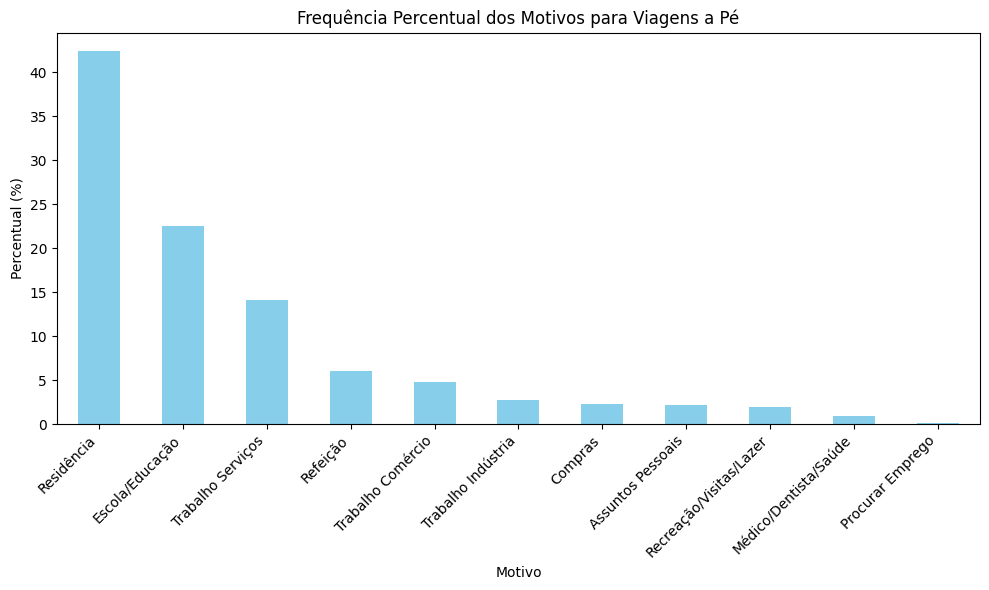

In [139]:
# Mapear os valores de MOTIVO_o para suas descrições
ped['MOTIVO_O_DESC'] = ped['MOTIVO_O'].map(o_reasons_dict)

# Contar a frequência de cada motivo e calcular percentual
counts = ped['MOTIVO_O_DESC'].value_counts()
percentages = (counts / counts.sum()) * 100

# Plotar gráfico de barras com porcentagens
plt.figure(figsize=(10, 6))
percentages.plot(kind='bar', color='skyblue')
plt.title('Frequência Percentual dos Motivos para Viagens a Pé')
plt.xlabel('Motivo')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

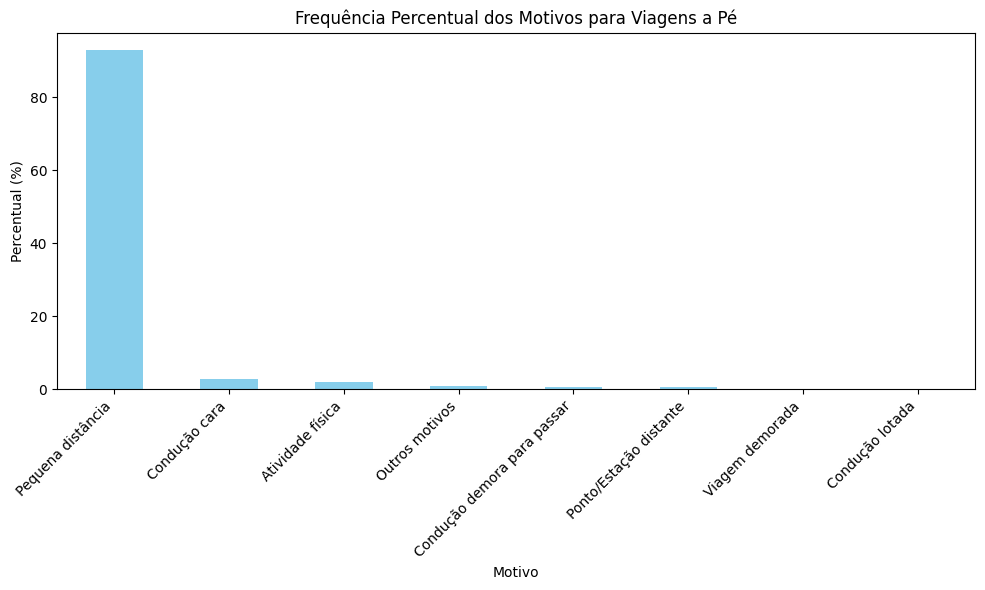

In [134]:
# Mapear os valores de PE_BICI para suas descrições
ped['PE_BICI_DESC'] = ped['PE_BICI'].map(reasons_dict)

# Contar a frequência de cada motivo e calcular percentual
counts = ped['PE_BICI_DESC'].value_counts()
percentages = (counts / counts.sum()) * 100

# Plotar gráfico de barras com porcentagens
plt.figure(figsize=(10, 6))
percentages.plot(kind='bar', color='skyblue')
plt.title('Frequência Percentual dos Motivos para Viagens a Pé')
plt.xlabel('Motivo')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## Distância média

In [104]:
dist_df = df[['ZONA_O', 'MUNI_O', 'ZONA_D', 'MUNI_D', 'FE_VIA','MODOPRIN', 'DISTANCIA']] 
dist_df['MODOPRIN_nome'] = dist_df['MODOPRIN'].map(t_modes_map)

C:\Users\55119\AppData\Local\Temp\ipykernel_16412\4087245673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_df['MODOPRIN_nome'] = dist_df['MODOPRIN'].map(t_modes_map)


In [108]:
distancia_media = dist_df.groupby('MODOPRIN_nome')['DISTANCIA'].mean().reset_index()

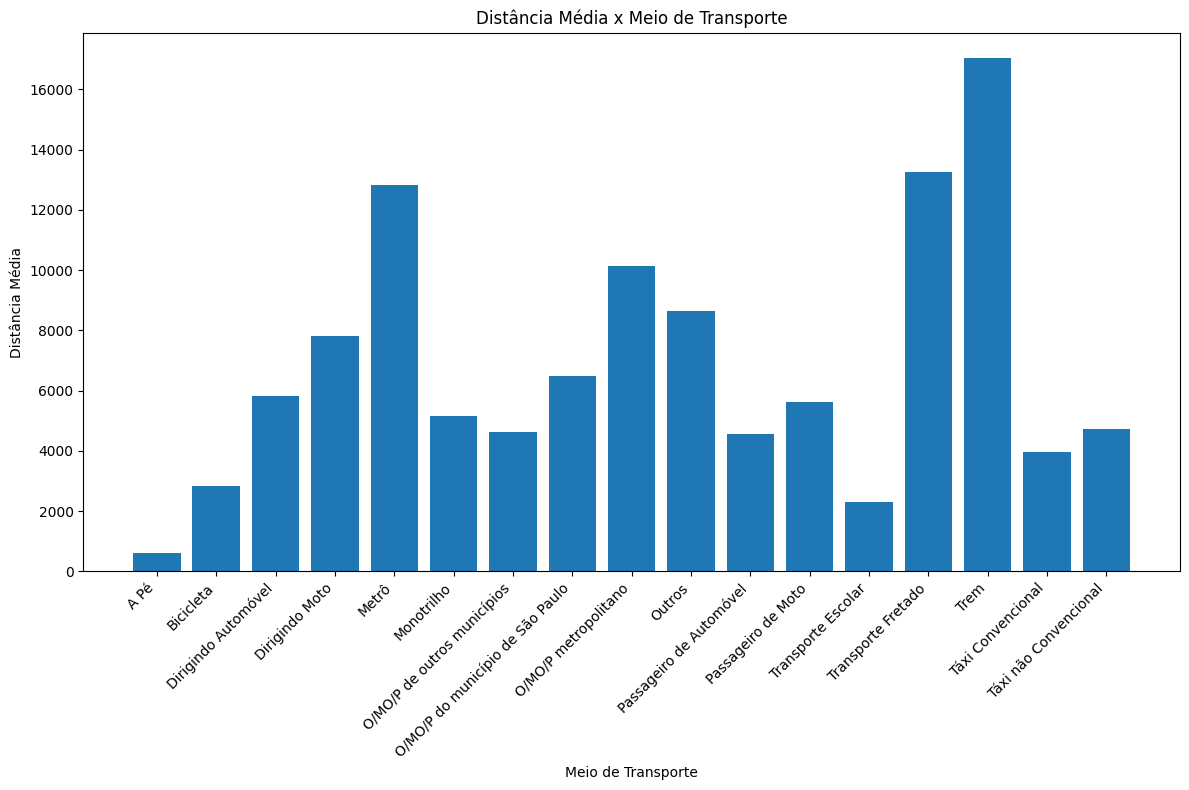

In [160]:
plt.figure(figsize=(12, 8))
plt.bar(distancia_media['MODOPRIN_nome'], distancia_media['DISTANCIA'])
plt.xlabel('Meio de Transporte')
plt.ylabel('Distância Média')
plt.title('Distância Média x Meio de Transporte')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Análise pelo Critério de Classificação Econômica Brasil

In [140]:
classes_dict = {
    1: 'A',
    2: 'B1',
    3: 'B2',
    4: 'C1',
    5: 'C2',
    6: 'D - E'
}

In [156]:
act_condition_dict = {
    1: 'Tem trabalho regular',
    2: 'Faz bico',
    3: 'Em Licença Médica',
    4: 'Aposentado/Pensionista',
    5: 'Sem Trabalho',
    6: 'Nunca Trabalhou',
    7: 'Dona de Casa',
    8: 'Estudante'
}

In [153]:
criterio_df = df[['ZONA_O', 'MUNI_O', 'ZONA_D', 'MUNI_D', 'FE_VIA','MODOPRIN', 'CRITERIOBR', 'CD_ATIVI']]
criterio_df['CRITERIO_BR_DESC'] = criterio_df['CRITERIOBR'].map(classes_dict)
criterio_df.head(2)

C:\Users\55119\AppData\Local\Temp\ipykernel_16412\2703713153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criterio_df['CRITERIO_BR_DESC'] = criterio_df['CRITERIOBR'].map(classes_dict)


,ZONA_O,MUNI_O,ZONA_D,MUNI_D,FE_VIA,MODOPRIN,CRITERIOBR,CD_ATIVI,CRITERIO_BR_DESC
0,1.0,36.0,3.0,36.0,22.132647,16.0,4.0,1,C1
1,3.0,36.0,1.0,36.0,22.132647,16.0,4.0,1,C1


### Análise do CRITERIOBR para pedestres

In [150]:
filtered_crit_df = criterio_df[criterio_df['MODOPRIN']==16] # filtrando viagens a pé
filtered_crit_df.head(5)

,ZONA_O,MUNI_O,ZONA_D,MUNI_D,FE_VIA,MODOPRIN,CRITERIOBR,CRITERIO_BR_DESC
0,1.0,36.0,3.0,36.0,22.132647,16.0,4.0,C1
1,3.0,36.0,1.0,36.0,22.132647,16.0,4.0,C1
5,1.0,36.0,1.0,36.0,22.132647,16.0,5.0,C2
6,1.0,36.0,1.0,36.0,22.132647,16.0,5.0,C2
7,1.0,36.0,1.0,36.0,22.132647,16.0,5.0,C2


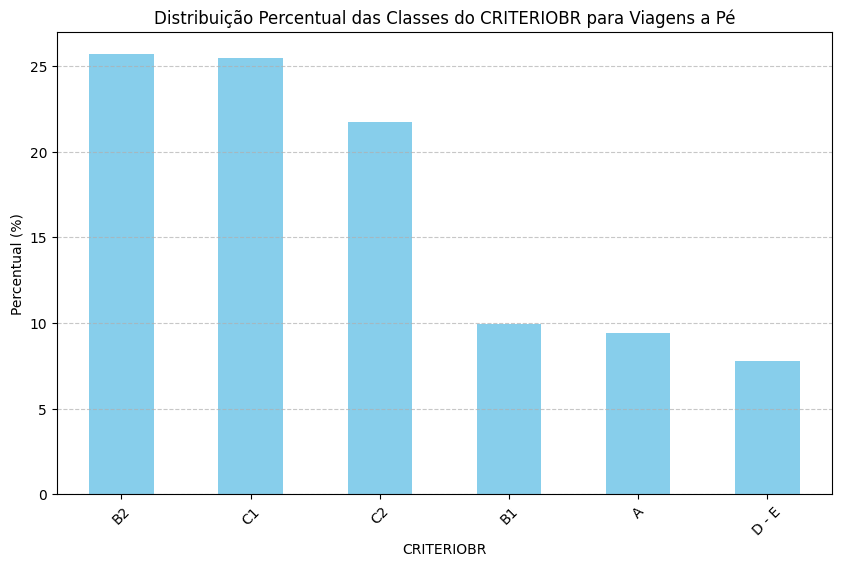

In [149]:
# Calcular a distribuição percentual de CRITERIOBR
distribution = filtered_crit_df['CRITERIO_BR_DESC'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
distribution.plot(kind='bar', color='skyblue')
plt.title('Distribuição Percentual das Classes do CRITERIOBR para Viagens a Pé')
plt.xlabel('CRITERIOBR')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

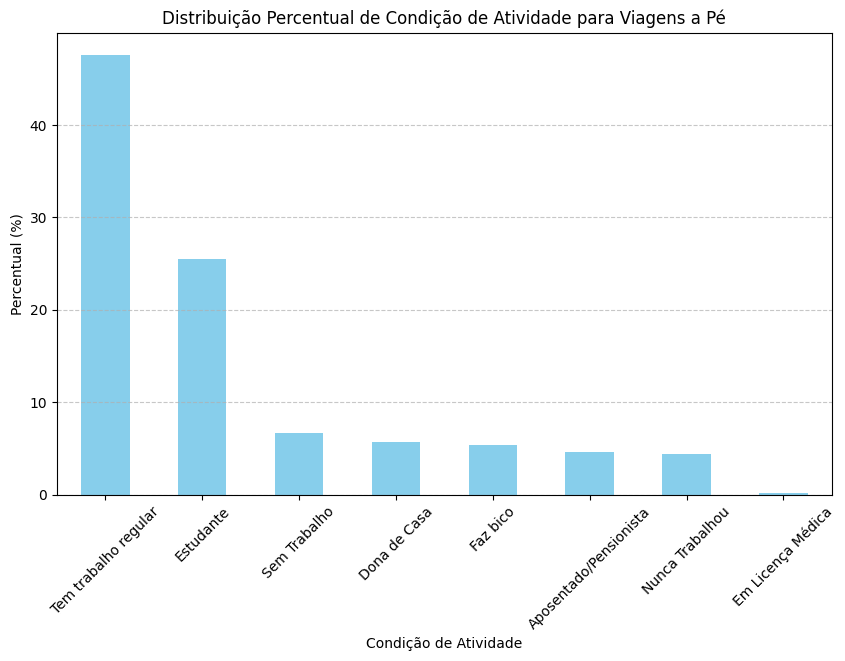

In [159]:
filtered_crit_df['CONDICAO_ATIV_DESC'] = criterio_df['CD_ATIVI'].map(act_condition_dict)

# Calcular a distribuição percentual de CONDIÇÃO de ATIVIDADE
act_condit_distribution = filtered_crit_df['CONDICAO_ATIV_DESC'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
act_condit_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribuição Percentual de Condição de Atividade para Viagens a Pé')
plt.xlabel('Condição de Atividade')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Aprofundando na classe B2

In [162]:
filter_B2_ped = filtered_crit_df[filtered_crit_df['CRITERIO_BR_DESC']=='B2']
filter_B2_ped.head(2)

,ZONA_O,MUNI_O,ZONA_D,MUNI_D,FE_VIA,MODOPRIN,CRITERIOBR,CRITERIO_BR_DESC,CONDICAO_ATIV_DESC
39,1.0,36.0,3.0,36.0,22.132647,16.0,3.0,B2,Tem trabalho regular
40,3.0,36.0,1.0,36.0,22.132647,16.0,3.0,B2,Tem trabalho regular


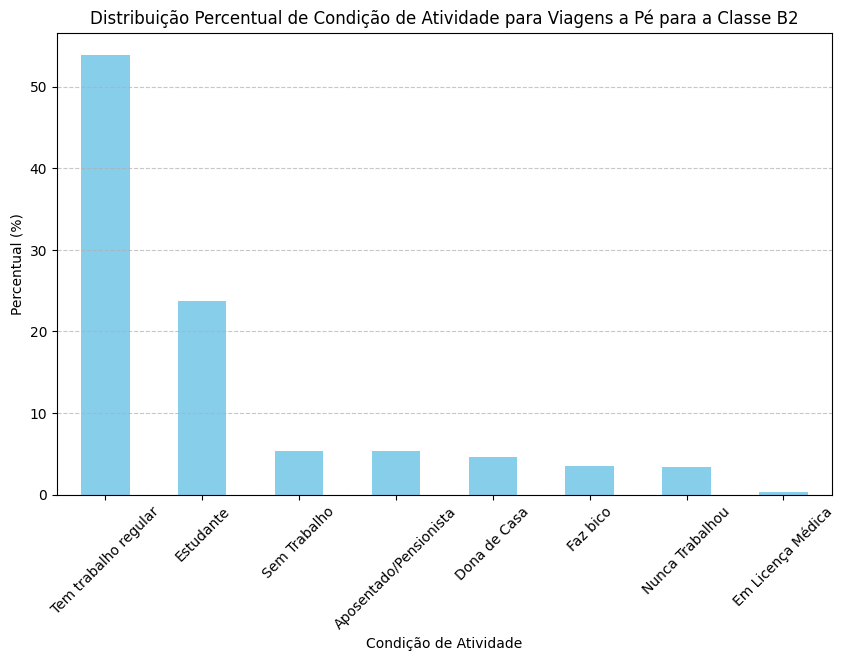

In [163]:
# Calcular a distribuição percentual de CONDIÇÃO de ATIVIDADE
act_condit_distribution = filter_B2_ped['CONDICAO_ATIV_DESC'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
act_condit_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribuição Percentual de Condição de Atividade para Viagens a Pé para a Classe B2')
plt.xlabel('Condição de Atividade')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()